In [63]:
import matplotlib.pyplot as plt

title = "Numbers"
row_length = 70
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 20

In [70]:
from IPython.display import Markdown

# Define a variable

# Display the variable's value in Markdown
contents = f"### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|",
              "|--|--|--|"
             ]
nums_t = []
sums = []
cur_table_limit = 0
for row in rows:
    cols = row.split('|')
    if len(cols) == 3:
        nums_list = [int(i) for i in cols[1].split(',')]
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str
Markdown(contents)


### Numbers
|round|numbers|bonus|
|--|--|--|
|1178|03,07,15,16,19,43|21|
|1177|03,07,15,16,19,43|21|
|1176|07,09,11,21,30,35|29|
|1175|03,04,06,08,32,42|31|
|1174|08,11,14,17,36,39|22|
|1173|01,05,18,20,30,35|3|
|1172|07,09,24,40,42,44|45|
|1171|03,06,07,11,12,17|19|
|1170|03,13,28,34,38,42|25|
|1169|05,12,24,26,39,42|20|
|1168|09,21,24,30,33,37|29|
|1167|08,23,31,35,39,40|24|
|1166|14,23,25,27,29,42|16|
|1165|06,07,27,29,38,45|17|
|1164|17,18,23,25,38,39|22|
|1163|02,13,15,16,33,43|4|
|1162|20,21,22,25,28,29|6|
|1161|02,12,20,24,34,42|37|
|1160|07,13,18,36,39,45|19|
|1159|03,09,27,28,38,39|7|

In [65]:
nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

print(nums_by_row)

[[10, 3, 3, 16, 11, 10, 7, 15, 3, 11, 1, 2, 6, 3, 13, 3, 6, 4, 10, 1, 5, 15, 1, 6, 13, 3, 1, 21, 4, 14, 5, 7, 7, 2, 10, 3, 2, 6, 7, 3, 8, 8, 2, 30, 1, 4, 10, 30, 5, 21, 3, 7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 3], [12, 7, 13, 20, 13, 16, 12, 16, 4, 13, 9, 19, 24, 6, 19, 8, 14, 5, 15, 5, 10, 19, 2, 7, 14, 7, 6, 33, 9, 16, 12, 10, 11, 8, 16, 4, 11, 11, 11, 6, 15, 9, 3, 31, 9, 8, 16, 31, 7, 25, 9, 13, 12, 21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 7], [13, 11, 30, 26, 20, 19, 23, 17, 9, 14, 12, 26, 31, 21, 21, 17, 25, 9, 24, 8, 11, 21, 6, 19, 20, 9, 13, 35, 12, 19, 15, 22, 12, 28, 17, 12, 31, 17, 24, 13, 19, 18, 9, 32, 10, 22, 19, 34, 12, 27, 27, 18, 20, 22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 15], [19, 20, 33, 36, 21, 32, 32, 25, 30, 15, 13, 31, 32, 30, 24, 30, 33, 11, 30, 16, 17, 25, 14, 28, 28, 13, 19, 38, 15, 20, 30, 29, 21, 30, 27, 15, 33, 19, 26, 15, 21, 35, 15, 35, 13, 26, 27, 39, 20, 32, 28, 36, 24, 25, 16, 25, 29, 27, 35, 30,

In [81]:
def draw_graph(X, title):
    print(X)
    plt.figure(figsize=(12, 6))
    plt.plot(X, label='Nums')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    plt.legend()
    plt.show()

[10, 3, 3, 16, 11, 10, 7, 15, 3, 11, 1, 2, 6, 3, 13, 3, 6, 4, 10, 1, 5, 15, 1, 6, 13, 3, 1, 21, 4, 14, 5, 7, 7, 2, 10, 3, 2, 6, 7, 3, 8, 8, 2, 30, 1, 4, 10, 30, 5, 21, 3, 7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 3]


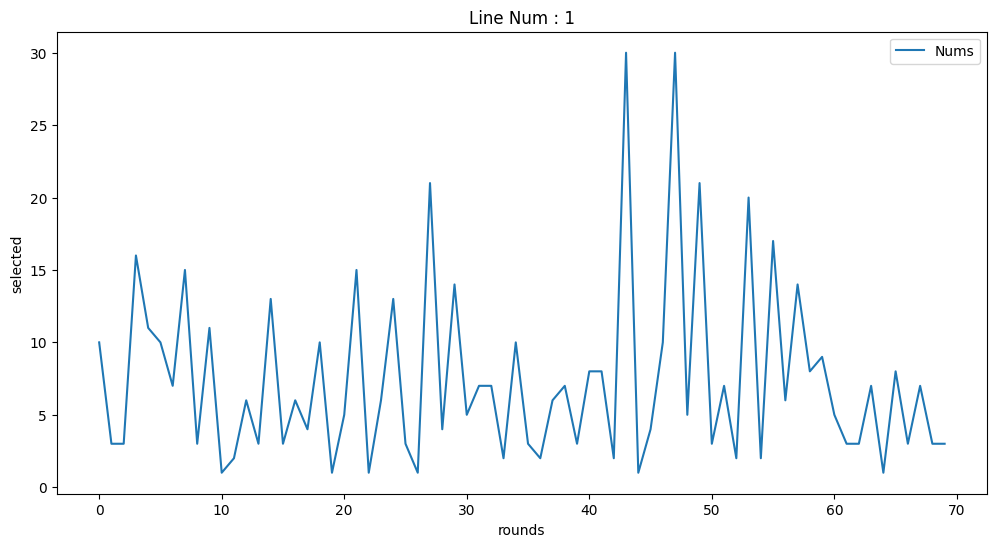

[12, 7, 13, 20, 13, 16, 12, 16, 4, 13, 9, 19, 24, 6, 19, 8, 14, 5, 15, 5, 10, 19, 2, 7, 14, 7, 6, 33, 9, 16, 12, 10, 11, 8, 16, 4, 11, 11, 11, 6, 15, 9, 3, 31, 9, 8, 16, 31, 7, 25, 9, 13, 12, 21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 7]


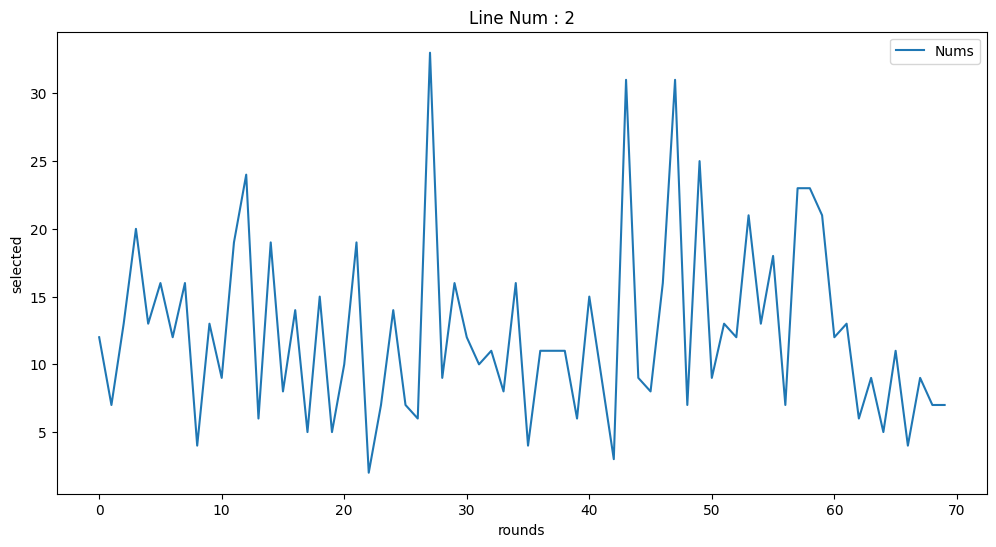

[13, 11, 30, 26, 20, 19, 23, 17, 9, 14, 12, 26, 31, 21, 21, 17, 25, 9, 24, 8, 11, 21, 6, 19, 20, 9, 13, 35, 12, 19, 15, 22, 12, 28, 17, 12, 31, 17, 24, 13, 19, 18, 9, 32, 10, 22, 19, 34, 12, 27, 27, 18, 20, 22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 15]


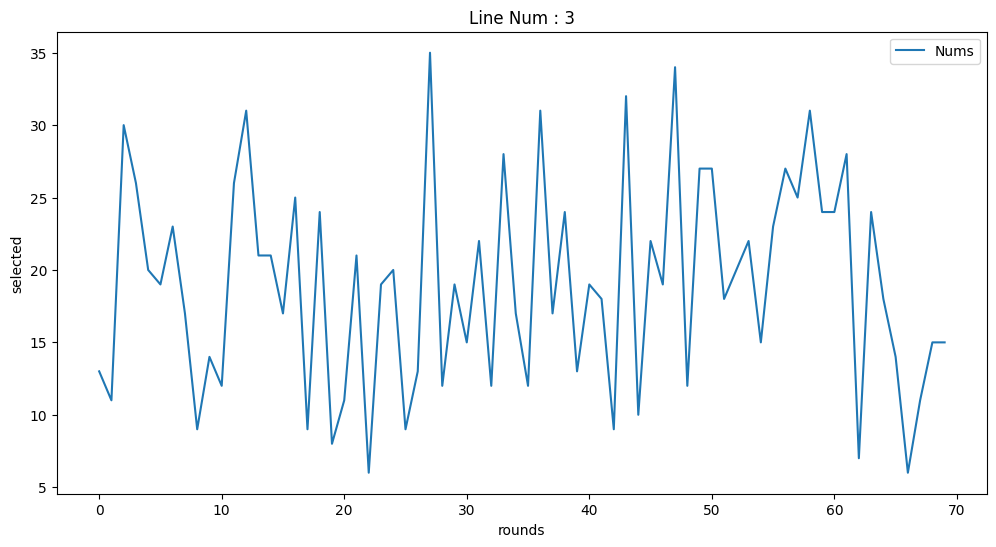

[19, 20, 33, 36, 21, 32, 32, 25, 30, 15, 13, 31, 32, 30, 24, 30, 33, 11, 30, 16, 17, 25, 14, 28, 28, 13, 19, 38, 15, 20, 30, 29, 21, 30, 27, 15, 33, 19, 26, 15, 21, 35, 15, 35, 13, 26, 27, 39, 20, 32, 28, 36, 24, 25, 16, 25, 29, 27, 35, 30, 26, 34, 11, 40, 20, 17, 8, 21, 16, 16]


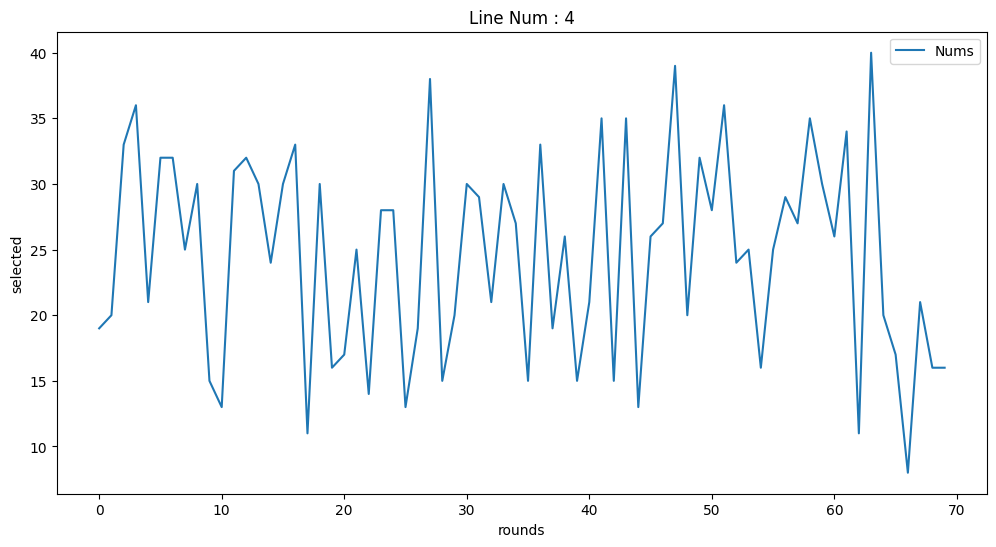

[33, 22, 43, 42, 32, 33, 34, 30, 33, 16, 20, 38, 38, 34, 34, 33, 40, 37, 31, 28, 28, 27, 27, 34, 29, 19, 21, 42, 33, 29, 37, 31, 26, 37, 28, 26, 37, 40, 27, 16, 32, 39, 27, 36, 35, 32, 37, 41, 25, 37, 38, 39, 34, 28, 33, 38, 38, 29, 39, 33, 39, 38, 12, 42, 30, 36, 32, 30, 19, 19]


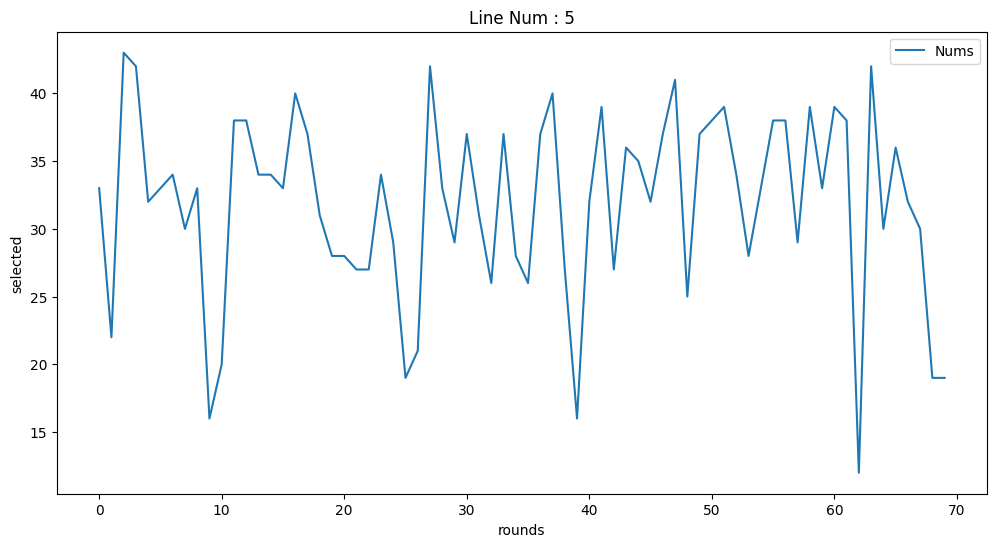

[40, 41, 45, 44, 44, 38, 36, 31, 36, 45, 45, 41, 44, 35, 35, 34, 44, 40, 37, 33, 34, 28, 38, 41, 34, 24, 33, 44, 45, 34, 40, 38, 35, 41, 36, 34, 44, 43, 37, 22, 36, 45, 29, 37, 44, 38, 38, 45, 26, 38, 39, 45, 42, 29, 43, 39, 45, 42, 40, 37, 42, 42, 17, 44, 35, 39, 42, 35, 43, 43]


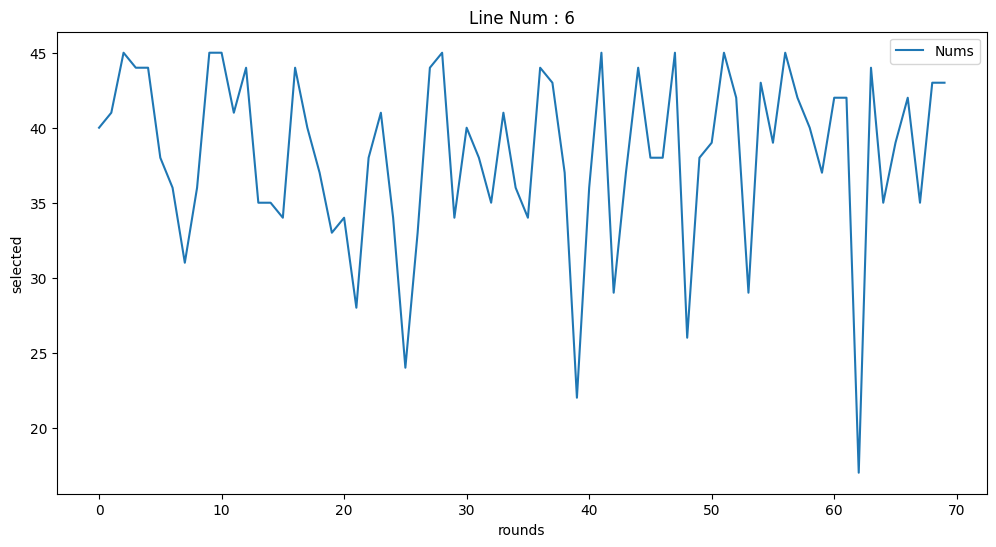

In [82]:
for i in range(6):
    draw_graph(nums_by_row[i], f'Line Num : {i+1}')

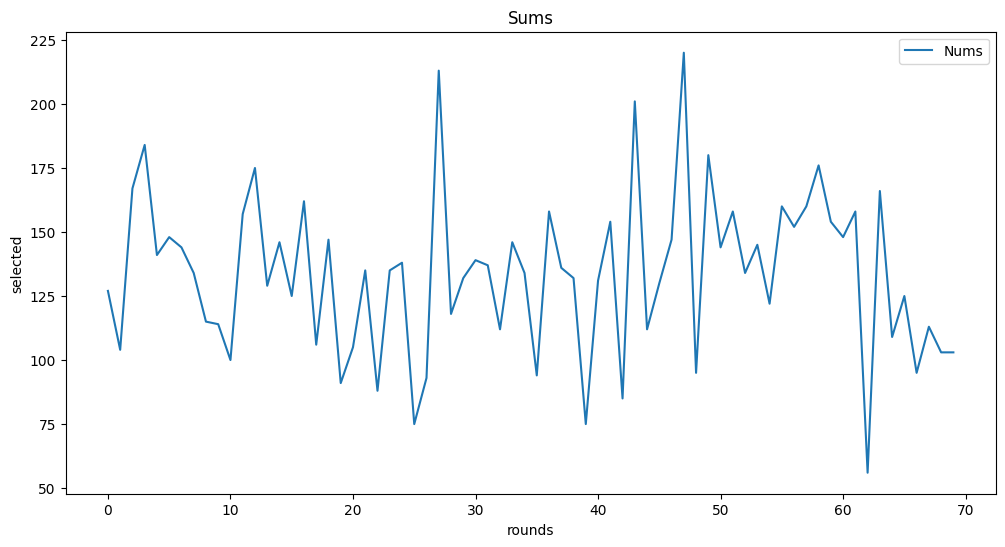

In [71]:
draw_graph(sums, f'Sums')

In [83]:
print(sums)
datas = (
    ((1750505603, [[7, 10, 18, 23, 28, 39]]), 0.5),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((1750505748, [[6, 9, 20, 25, 31, 42]]), 575.33),
    ((115870, [[8, 11, 19, 26, 30, 43]]), 32.164),
    )
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')

[127, 104, 167, 184, 141, 148, 144, 134, 115, 114, 100, 157, 175, 129, 146, 125, 162, 106, 147, 91, 105, 135, 88, 135, 138, 75, 93, 213, 118, 132, 139, 137, 112, 146, 134, 94, 158, 136, 132, 75, 131, 154, 85, 201, 112, 130, 147, 220, 95, 180, 144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 103]
[7, 10, 18, 23, 28, 39]
sum = 125
[7, 12, 24, 28, 34, 41]
sum = 146
[10, 13, 19, 23, 28, 40]
sum = 133
[6, 9, 20, 25, 31, 42]
sum = 133
[8, 11, 19, 26, 30, 43]
sum = 137


In [113]:
print(sums[-20:])
datas = (
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((114225, [[10, 13, 20, 24, 30, 40]]), 202.36),
    ((11114613, [[8, 12, 21, 26, 31, 39]]), 77.591),
    ((31116739, [[6, 9, 21, 28, 32, 42]]), 730.62006),
    ((114106, [[9, 12, 21, 26, 30, 40]]), 393.44),
    ((31116775, [[8, 13, 21, 27, 34, 41]]), 302.73),
)
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]
   ]
for i in l1:
    print(i)
    print(f'sum = {sum(i)}')
last = [3, 7, 15, 16, 19, 43]
print(f'{"*"*20}\nlast : \n{last}\nsum = {sum(last)}')


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 103]
[10, 13, 19, 23, 28, 40]
sum = 133
[7, 12, 24, 28, 34, 41]
sum = 146
[10, 13, 20, 24, 30, 40]
sum = 137
[8, 12, 21, 26, 31, 39]
sum = 137
[6, 9, 21, 28, 32, 42]
sum = 138
[9, 12, 21, 26, 30, 40]
sum = 138
[8, 13, 21, 27, 34, 41]
sum = 144
[12, 21, 26, 28, 34, 39]
sum = 160
[13, 20, 24, 30, 40, 42]
sum = 169
********************
last : 
[3, 7, 15, 16, 19, 43]
sum = 103


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 138]


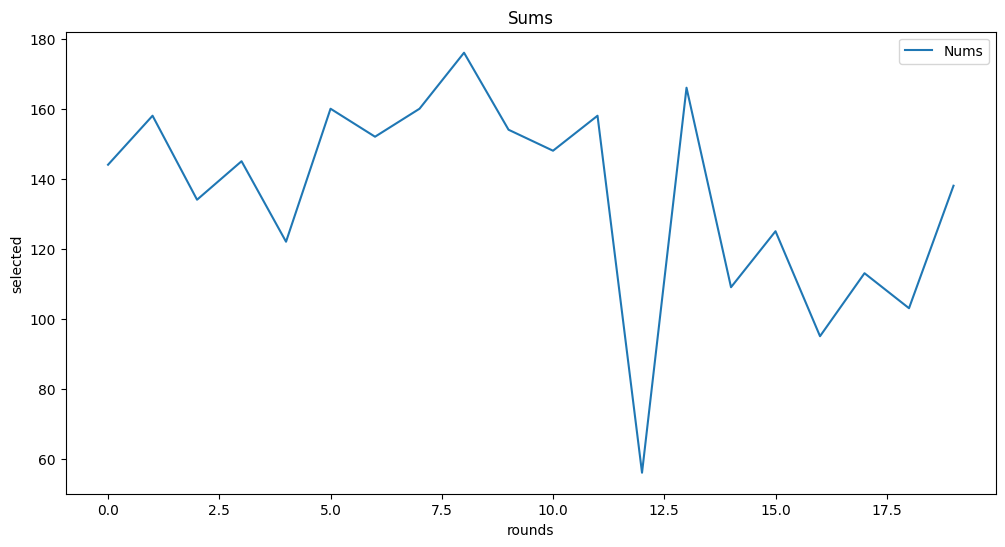

In [115]:
draw_graph(sums[-20:-1]+[138], f'Sums')

In [101]:
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]
   ]
for i in l1:
    print(sum(i))

160
169
